In [1]:
import os
import requests
from bs4 import BeautifulSoup

# set up search query
query = "elon musk face"

# set up request parameters
params = {"q": query, "tbm": "isch"}

# send request to Google Images
url = "https://www.google.com/search"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36 Edge/16.16299"}
response = requests.get(url, params=params, headers=headers)

# parse response using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")
img_tags = soup.find_all("img")

# create directory to store images
if not os.path.exists(query):
    os.makedirs(query)

# download and save images
for i, img_tag in enumerate(img_tags):
    img_url = img_tag.get("src")
    try:
        response = requests.get(img_url)
        with open(query + "/" + query + "_" + str(i+1) + ".jpg", "wb") as f:
            f.write(response.content)
    except:
        continue


In [ ]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical

# set path to dataset
data_path = r'/Users/rohitshetty/Desktop/elon musk face'
folders = os.listdir(data_path)

# create labels for the dataset
labels = []
images = []
for folder in folders:
    if folder == '.DS_Store':
        continue
    files = os.listdir(os.path.join(data_path, folder))
    for file in files:
        if file == '.DS_Store':
            continue
        img_path = os.path.join(data_path, folder, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (128, 128))
        images.append(img)
        labels.append(folder)

# convert labels to categorical data
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
labels = to_categorical(labels)

# create training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# reshape and normalize training and validation sets
X_train = np.array(X_train).reshape(-1, 128, 128, 1).astype('float32') / 255.
X_val = np.array(X_val).reshape(-1, 128, 128, 1).astype('float32') / 255.

# create CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(folders), activation='softmax'))

# compile and train model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# use trained model to recognize faces
test_path = './test'
files = os.listdir(test_path)
for file in files:
    if file == '.DS_Store':
        continue
    img_path = os.path.join(test_path, file)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128, 128))
    img = np.array(img).reshape(-1, 128, 128, 1)
    img = img.astype('float32') / 255.
    prediction = model.predict(img)
    prediction = np.argmax(prediction)
    print('Prediction for', file, 'is', label_encoder.inverse_transform([prediction])[0])


In [3]:
import numpy as np
import cv2
import os

# Load the pre-trained model
model = cv2.dnn.readNetFromCaffe("deploy.prototxt.txt", "res10_300x300_ssd_iter_140000.caffemodel")

# Load the image
image = cv2.imread(r"/Users/rohitshetty/Desktop/elon musk face/elon musk face_2.jpg")

# Preprocess the image
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

# Pass the image through the network
model.setInput(blob)
detections = model.forward()

# Loop over the detections
for i in range(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]

    # Filter out weak detections
    if confidence > 0.5:
        # Compute the (x, y)-coordinates of the bounding box for the face
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        # Draw the bounding box and confidence level on the image
        text = "{:.2f}%".format(confidence * 100)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
        cv2.putText(image, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

# Display the output image
cv2.imshow("Output", image)
cv2.waitKey(0)

error: OpenCV(4.7.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/dnn/src/caffe/caffe_io.cpp:1126: error: (-2:Unspecified error) FAILED: fs.is_open(). Can't open "deploy.prototxt.txt" in function 'ReadProtoFromTextFile'


In [ ]:
pip uninstall tensorflow


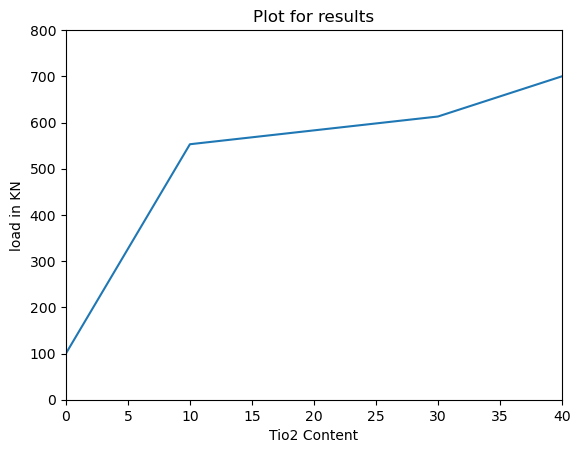

In [2]:
import matplotlib.pyplot as plt

# define x and y data points
x = [0, 10, 20, 30, 40]
y = [100, 553, 583, 613, 700]

# create a figure and axis object
fig, ax = plt.subplots()

# plot the data as a line graph
ax.plot(x, y)

# set the x and y axis limits
ax.set_xlim([0, 40])
ax.set_ylim([0, 800])

# add x and y axis labels
ax.set_xlabel('Tio2 Content')
ax.set_ylabel('load in KN')

# add a title to the graph
ax.set_title('Plot for results')

# display the graph
plt.show()